# Sensitivity analysis for Bayesian networks using credal networks

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

There are several sensitivity analysis frameworks for Bayesian networks. A fairly efficient method is certainly to use credal networks to do this analysis.

## Creating a Bayesian network

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [2]:
bn=gum.fastBN("A->B->C<-D->E->F<-B")
gnb.flow.row(bn,gnb.getInference(bn))

## Building a credal network from a BN

It is easy to build a credal network from a Bayesian network by indicating the 'noise' on each parameter.

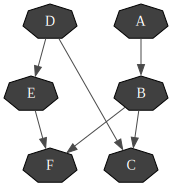

In [3]:
cr=gum.CredalNet(bn,bn)
gnb.show(cr)

In [4]:
cr.bnToCredal(beta=1e-10,oneNet=False)
cr.computeBinaryCPTMinMax()
print(cr)


A:Range([0,1])
<> : [[0.652524 , 0.347476] , [0.652515 , 0.347485]]

B:Range([0,1])
<A:0> : [[0.462685 , 0.537315] , [0.462527 , 0.537473]]
<A:1> : [[0.48708 , 0.51292] , [0.486972 , 0.513028]]

C:Range([0,1])
<B:0|D:0> : [[0.855494 , 0.144506]]
<B:1|D:0> : [[0.824532 , 0.175467]]
<B:0|D:1> : [[0.814573 , 0.185427] , [0.814572 , 0.185428]]
<B:1|D:1> : [[0.501477 , 0.498523] , [0.501391 , 0.498609]]

D:Range([0,1])
<> : [[0.468336 , 0.531664] , [0.468192 , 0.531808]]

E:Range([0,1])
<D:0> : [[0.185998 , 0.814002] , [0.150543 , 0.849457]]
<D:1> : [[0.475936 , 0.524064] , [0.475808 , 0.524192]]

F:Range([0,1])
<E:0|B:0> : [[0.186409 , 0.813591] , [0.151717 , 0.848283]]
<E:1|B:0> : [[0.223432 , 0.776568] , [0.212033 , 0.787967]]
<E:0|B:1> : [[0.461751 , 0.538249] , [0.461591 , 0.538409]]
<E:1|B:1> : [[0.342526 , 0.657474] , [0.341378 , 0.658622]]




## Testing difference hypothesis about the global precision on the parameters

We can therefore easily conduct a sensitivity analysis based on an assumption of error on all the parameters of the network.

In [5]:
def showNoisy(bn,beta):
  cr=gum.CredalNet(bn,bn)
  cr.bnToCredal(beta=beta,oneNet=False)
  cr.computeBinaryCPTMinMax()
  ielbp=gum.CNLoopyPropagation(cr)  
  return gnb.getInference(cr,engine=ielbp)

In [6]:
for eps in [1,1e-3,1e-5,1e-8,1e-10]:
  gnb.flow.add(showNoisy(bn,eps),caption=f"noise={eps}")
gnb.flow.display()